# Assigment 1

# Part One: Network Models

## 1. Watts-Strogatz Networks

* Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.

The 3 graphs with the characteristics specified are generated with the code below.

In [14]:
import networkx as nx

#Generate of three different graphs with different values of probability
gr = nx.watts_strogatz_graph(500,4,0)
gr1 = nx.watts_strogatz_graph(500,4,0.1)
gr2 = nx.watts_strogatz_graph(500,4,1)

After the creation of the graphs, the average shortest path for each of them is calculated as follows.

In [15]:
#Calculate of the average shortest path length for each graph
print(nx.average_shortest_path_length(gr))
print(nx.average_shortest_path_length(gr1))
print(nx.average_shortest_path_length(gr2))

62.875751503
7.48436873747
4.72704609218


With the results obtained, it can be appreciated that the bigger the p is, the smaller the average of shorted path is.
So, when $p=0$, each node is just connected with its immediate neighbours and it takes more jumps to arrive to the other nodes. But, when $p=1$, it is easier to arrive from one to another because, as it is stated at Watts-Strogatz Model, the network contains more random jumps. This way, when random edges are introduced, shortcuts to the graph's nodes, with long initial distances between them, are provided.

In conclusion, it can be seen that the bigger the p is, the more random the network is and the shorter the distances between nodes get, which is exactly what Watts-Strogatz Model states.

Let's understand the behavior of the WS model as the *p* is increased in more detail. 

Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot.

The $\langle d \rangle$ of each of the $[50*6]$ networks generated is calculated with the code below.

In [16]:
j = [0,0.01,0.03,0.05,0.1,0.2]
myDict = {}
for i in j:
    myList = []
    for z in range(0,50):
        #Generate a new graph with the given value of probability 
        gr = nx.watts_strogatz_graph(500,4,i)
        #Save the average shortest path length of the generated graph
        myList.append(nx.average_shortest_path_length(gr))
    myDict[i] = myList

The average of $\langle d \rangle$ as well as the standard deviation for each of the networks generated is calculated.

In [17]:
import numpy as np

means = []
stds = []
for i in j:
    #Mean
    means.append(np.mean(myDict[i]))
    #Standard deviation
    stds.append(np.std(myDict[i]))

The results calculated are plotted below.

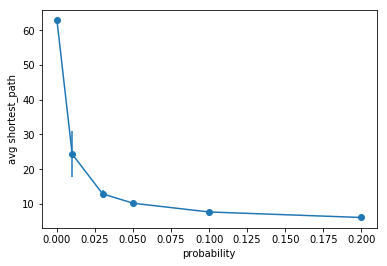

In [18]:
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt

pyplot.errorbar(j, means, stds, marker='o', label='1')
pyplot.ylabel('avg shortest_path')
pyplot.xlabel('probability')
pyplot.show()

With the plot displayed, it can be seen that the path length decreases very quickly with only a little fraction of re-wiring.

## 2. The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success

* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.

The code generated to create and display the specified network is the one showed below.

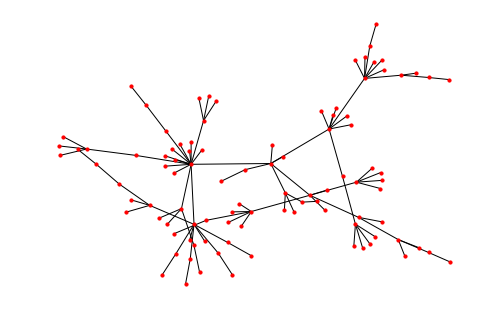

In [6]:
import itertools
from random import choice

# Create node consisting of a single link
G = nx.Graph()
G.add_edge(0, 1)

# Add the new nodes and links up to 100
for i in range(2,100):
    #Flatten list of nodes to choose them according to probability
    flattenList = list(itertools.chain(*G.edges))
    #Choose one randomly
    random_node = choice(flattenList)
    #Add the new random link
    G.add_edge(i, random_node)
    
#Plot the generated node
nx.draw(G, node_size = 10, with_labels=False)

* Now create a 5000 node network.
  * What's the maximum and minimum degree?
  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.

First, the 5000 node network has been created reusing the 100 node BA network generated during the previous exercise.

In [7]:
for i in range(100,5000):
    flattenList = list(itertools.chain(*G.edges))
    random_node = choice(flattenList)
    #G.add_node(i)
    G.add_edge(i, random_node)

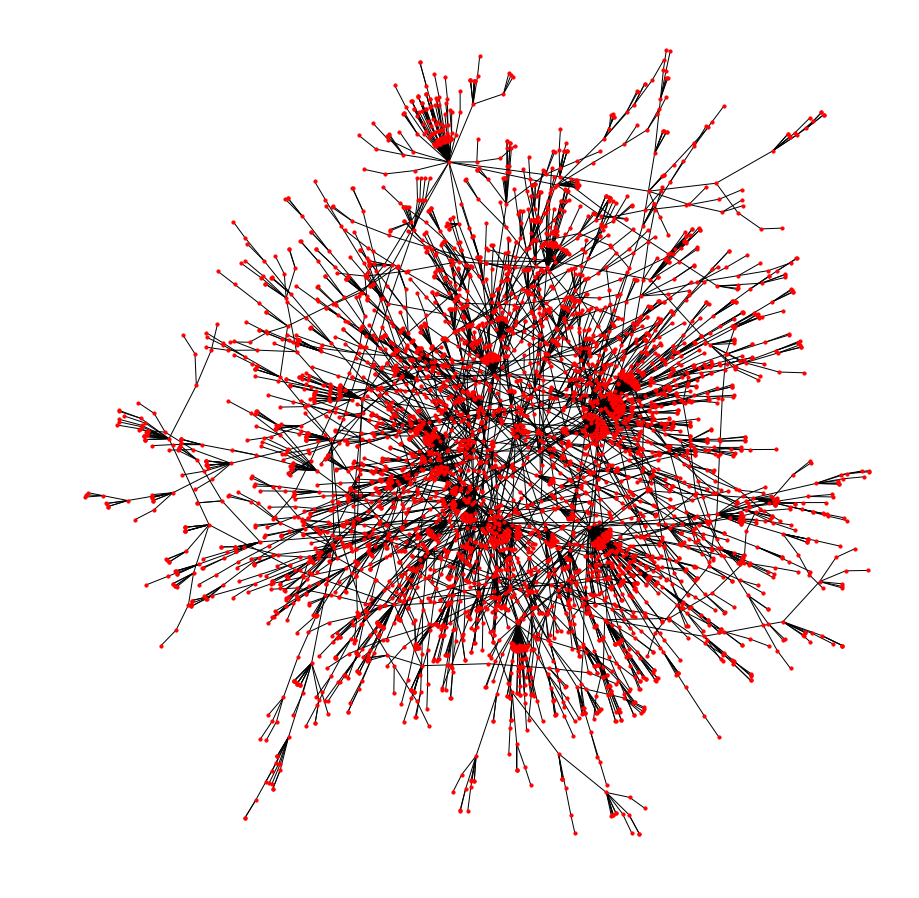

In [8]:
options = {
    'node_color': 'red',
    'node_size': 10,
    'width': 1,
}
plt.figure(3,figsize=(12,12))
#Plot the generated node
nx.draw(G, with_labels=False, **options)
plt.show()

With the network generated, the maximum degree has been > 100 and the minumum 1, which means that there is no node isolated and all nodes are connected to another.

In [9]:
degrees = [val for (node, val) in G.degree()]
print("Maximum degree: "+str(max(degrees)))
print("Minimum degree: "+str(min(degrees)))

Maximum degree: 94
Minimum degree: 1


The degree distribution is plotted below.


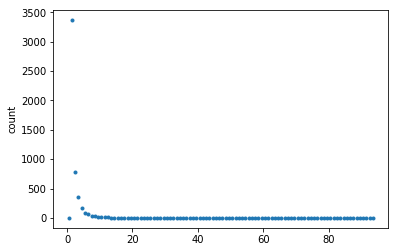

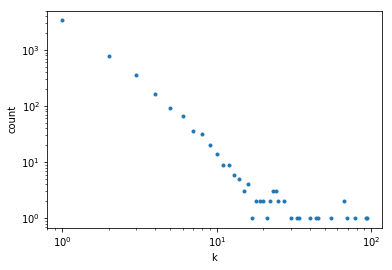

In [10]:
import numpy as np   

#Bin the degree distribution
histo, bin_edges = np.histogram(degrees, bins=range(max(degrees)+1))

bincenters = 0.5*(bin_edges[1:]+bin_edges[:-1])
#Plot the linear distribution
pyplot.plot(bincenters,histo,'.')
pyplot.ylabel('count')
pyplot.show()
#Plot the log-log distribution
pyplot.loglog(histo, '.') 
pyplot.ylabel('count')
pyplot.xlabel('k')
pyplot.show()

## 3. Power-laws and the friendship paradox

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that almost everyone have fewer friends than their friends have, on average.
This might come into contradiction with most people's beliefs but it is a direct concequence of a scale free network that follows a power law, such as the friendship/ social network between people.
The BA scale free model should be able to help us to depict that social network more accurately by introducing the elements of Growth and of Preferential Attachment.
Thus, the validation of the Friendship paradox will be done by selecting nodes at random and comparing their degrees with the average degree of their neighbors's. 
The process followed is:

* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?
    * Pick a node i at random (e.g. use random.choice). Find its degree.
    * Find it's neighbors. Calculate their average degree.
    * Compare the two numbers to check if it's true that i's friends (on average) have more friends than i.
* Repeat 1000 times and present how many out of those 1000 times is the friendship paradox true

Below a node is picked at random and its degree is found.
Afterwards its neighbors are returned and their average degree is calculated. Finally the script prints True if the random node data validates the Friendship paradox and False otherwise.


In [11]:
# Choose a random node
flattenList = list(G.nodes)
random_node = choice(flattenList)
# Calculate the degree of the random node
nodDe = G.degree(random_node)
# Obtain all neighbors of the random node
neigh = [n for n in G.neighbors(random_node)]
# Calculate their degrees
neighDe = G.degree(neigh)
# Keep all degree values
values = [x[1] for x in neighDe]
# Calculate the mean of the degree
if (len(values)>1):
    neighmean = np.mean(values)
else:
    neighmean = values[0]
print(nodDe < neighmean)

True


As it can be seen with the result retrieved, it is true that the mean degree of all the neighbours of the node chosen at random is bigger than the degree value of the node.

Now, the above procedure is repeated for 1000 randomly selected nodes and the number of times that the Friendship paradox has been validated is presented below.

In [12]:
count = 0
flattenList = list(G.nodes)
for i in range(1000):
    random_node = choice(flattenList)
    nodDe = G.degree(random_node)
    neigh = [n for n in G.neighbors(random_node)]
    neighDe = G.degree(neigh)
    values = [x[1] for x in neighDe]
    if (len(values)>1):
        neighmean = np.mean(values)
    else:
        neighmean = values[0]
    if nodDe < neighmean:
        count+=1 
#     print "Num of node: ", nodDe, "- Avg. of its neighbors:", neighmean
print "Friendship paradox has been true", count ,"times"

Friendship paradox has been true 870 times


As it can be realised with the result obtained, the Friendship paradox is validated 870 times out of 1000, which means that it occurs the $87\%$ of the times.

# Part Two: The network of American politics

This exercise assumes that you have already downloaded wiki-pages and created the directed network of members of congress from Wikipedia. If you are interested in re-running our code please make sure to note the pd.read_csv() paths to recreate the same file structure as the code.



In [1]:
import pandas as pd

#Load all the information from the three csv files, previously downloaded
df = pd.read_csv('./data/H113.csv')
df['congress_number'] = 113

df_1 = pd.read_csv('./data/H114.csv')
df_1['congress_number'] = 114

df_2 = pd.read_csv('./data/H115.csv')
df_2['congress_number'] = 115

all_members = pd.concat([df, df_1, df_2]).reset_index(drop= True)

In [14]:
#all_members


* Plot the number of *members* of the house of Representatives over time. You chose if you want to use a line-chart or a bar-chart. Is this development over time what you would expect? Why? Explain in your own words.

On the code snippets below, the process of plotting the number of members of the house of Representatives over time is depicted.

To be able to implement it, at start, the groups by are created based on the Congress Number of each Representative. The result of this grouping is printed out below.

In [15]:
groups = all_members.groupby('congress_number')

members_in_congress = groups.size()
#members_in_congress

Finally, the before mentioned results are plotted in a line-chart to be able to visualy see the differences between the values obtained.

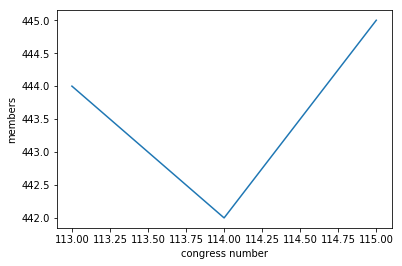

In [16]:
import matplotlib.pyplot as plt

members_in_congress.plot()
plt.ylabel('members')
plt.xlabel('congress number')
#plt.xticks(members_in_congress.index.values, 1)
plt.show()

The obtained development over time is not the expected one. Based on the [United States Congress Wikipedia page](https://en.wikipedia.org/wiki/United_States_Congress), the number of representatives is constant at the number of 435 with 6 non-voting delegates coming from Puerto Rico, American Samoa, Guam, the Northern Mariana Islands, the U.S. Virgin Islands, and Washington, D.C., which reaches a final number of 441 representatives. The above numbers are subject of a recent and interesting article of the political repercussions they can have in a country with growing population. You can access it [here](http://www.pewresearch.org/fact-tank/2018/05/31/u-s-population-keeps-growing-but-house-of-representatives-is-same-size-as-in-taft-era/).

Thus, it can be inferred that there is some issue with the data that has been collected and processed. There can be two hypotheses here: 

On the one hand, the data includes resigned or, for any reason, departed congressmen and congresswomen, leading to flactuated numbers. 
Or, on the other hand, the collection and parsing of data has been erroneous.

* How many members appear in all the three congresses? How many in two? How many in one? Plot your results using a histogram.

Below the number of re-elected congressmen and congresswomen is found and the results plotted.

Again, at start, the groups by are created based on the name of each Representative.

In [17]:
groups = all_members.groupby('WikiPageName')

Then, the size of each group, which is the sum of represenatives with the same number of being elected, is found and sorted.

In [18]:
times_in_congress = groups.size().sort_values()

Since *times_in_congress* is a Pandas Series, its data is grouped to find how many congressmen and congresswomen where members of one, two or three congresses. The results are then plotted.

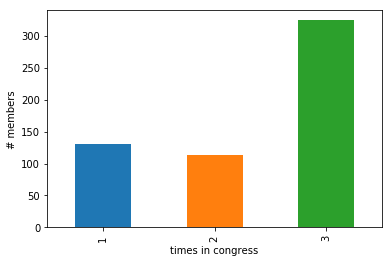

In [19]:
#series and not a data frame
result = times_in_congress.groupby(times_in_congress).size()
result.plot('bar')
plt.ylabel('# members')
plt.xlabel('times in congress')
plt.show()

Now, an answer is given to the following questions:
* Which states are more represented in the house of representatives? 
* Which are less? 

In [20]:
groups = all_members.groupby('State')

states = groups.size().sort_values()
states_rep_num_list = list(zip(states, states.index))
min_num_rep = states_rep_num_list[0][0]
max_num_rep = states_rep_num_list[-1][0]
print("Less represented states (Nr. repr.:"+str(min_num_rep)+"):")
for state in states_rep_num_list:
    if (state[0] == min_num_rep):
        print(state[1])
    else:
        break
print("Most represented states (Nr. repr.:"+str(max_num_rep)+"):")
index = -1
while(True):
    if (states_rep_num_list[index][0] == max_num_rep):
        print(states_rep_num_list[index][1])
        index -= 1
    else:
        break

Less represented states (Nr. repr.:3):
Wyoming
Alaska
Vermont
North Dakota
Delaware
South Dakota
Most represented states (Nr. repr.:160):
California


Just above we can see the list of the states that are more or less represented in the house of representatives.

Finally a histogram showing the number of members per state is plotted.

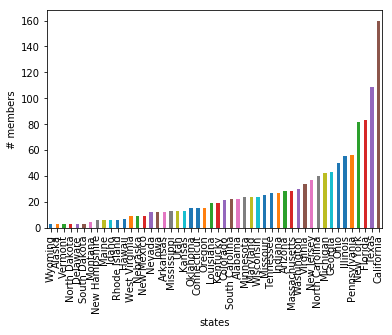

In [21]:
states.plot('bar')
plt.ylabel('# members')
plt.xlabel('states')
plt.show()

Now, an answer is given to the following question:
* How has the party composition of the house of representative changed over time? Plot your results. 

This is achieved by first grouping by two variables: Party and Congress Number of the Representative

In [22]:
party = all_members.groupby(['Party', 'congress_number'])
partySize = party.size()

Then, the result is plotted in a graph, having the number of Democratic representatives as blue bars of the histogram and the Republican on the red ones.

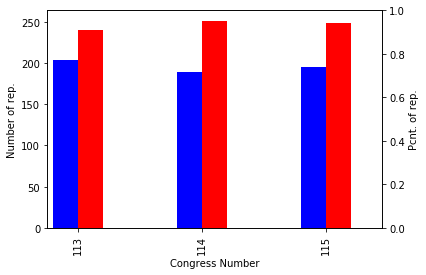

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111) # Create matplotlib axis
ax2 = ax.twinx() # Create another axis sharing the same x-axis with ax
width = 0.2

partySize['Democratic'].plot(kind='bar', color='blue', ax=ax, width=width, position=1)
partySize['Republican'].plot(kind='bar', color='red', ax=ax, width=width, position=0)

ax.set_ylabel('Number of rep.')
ax.set_xlabel('Congress Number')
ax2.set_ylabel('Pcnt. of rep.')
plt.show()

## 5. Basic stats for the network

Create simple network statistics for the **113th house of representatives**.

Below, a network involving the Representatives of the 113th House is created.

Specifically, the page content for every representative in the 113th House is fetched and saved into a file in the data/113 directory with a filename same as the title of the representative's name in his Wikipedia page.

For example: [Aaron Shock's](https://en.wikipedia.org/wiki/Aaron_Schock) page contents can be found in: data/113/Aaron_Schock

In [24]:
#import urllib2
#import json
#import io

#construction of the API query
#baseurl = "http://en.wikipedia.org/w/api.php/?"
#action = "action=query"
#content = "prop=revisions"
#rvprop ="rvprop=timestamp|content"
#dataformat = "format=json"
#rvdir = "rvdir=older" #sort revisions from newest to oldest
#start = "rvend=2000-01-03T00:00:00Z" #start of my time period
#end = "rvstart=2015-01-01T00:00:00Z" #end of my time period
#limit = "rvlimit=1" #consider only the first revision

#memberCongress113 = all_members[all_members.congress_number == 113]
#for member in memberCongress113.WikiPageName:
    #title = "titles=" + member[0]
    #query = "%s%s&%s&%s&%s&%s&%s&%s&%s&%s" % (baseurl, action, title, content, rvprop, dataformat, rvdir, end, start, limit)
    #req = urllib2.Request(query)
    #response = urllib2.urlopen(req)
    #the_page = response.read()
    #json_string = json.loads(the_page)
    #f = io.open('./data/113/'+member, 'a+', encoding='utf-8')
    #f.write(unicode(the_page, "utf-8")) 
    #f.close()
    

Below, it lies the proceding of the before mentioned graph's creation.
The code follows this execution next detailed schema:
* For every member (member1) of the 113th Congress:
    * Get all pages that redirect to this congressman's page and add it to our member_redirect_dict
* For every member (member1) of the 113th Congress:
    * Create a node in the graph
    * Open the member's file in /data/113
    * For every link:
        * Strip link to its useful parts and create new link string without any parentheses
        * If link in member_redirect_dict then match
            * In case of a match, create the edge (member1, member2)

In [9]:
import re
import io
import networkx as nx
import json
import requests

memberCongress113 = all_members[all_members.congress_number == 113]
G = nx.DiGraph()
member_list = memberCongress113.WikiPageName.tolist()
member_list = set(member_list)

df = pd.read_csv('./data/H113.csv', encoding='utf-8')
redirect_dict = {}
non_member_list = set()

member_redirect_set = set()
member_redirect_dict = {}
count = 0
for member in member_list:
    print("Congressman "+ str(count) +" passed")
    count += 1
    query = requests.get(r'https://en.wikipedia.org/w/api.php?action=query&titles={}&prop=redirects&format=json'.format(member))
    data = json.loads(query.text)
    for page, value_page in data['query']['pages'].iteritems():
        try:
            for title_dict in value_page['redirects']:
                title = title_dict['title'].replace(" ", "_")
                member_redirect_set.add(title)
                member_redirect_dict[title] = member
        except:
            pass
    member_redirect_dict[member] = member

for member in memberCongress113.values.tolist():
    print(member)
    # Create node and its attributed
    G.add_node(member[0])
    nx.set_node_attributes(G, {member[0]: {"State": member[2]}})
    nx.set_node_attributes(G, {member[0]: {"Party": member[1]}})
    path_folder = './data/113/'
    path_folder = path_folder+member[0]
    f = io.open(path_folder, 'r', encoding='utf-8').read()
    # Get all links
    links = re.findall("\[\[(.*?)\]\]",f)
    links = set(links)
    for link in links:
        # Clean link
        splitedLink = link.split("|")
        link = splitedLink[0]
        link = link.replace(" ", "_")
        try:
            if (member_redirect_dict[link] in member_list):
                if (link != member[0]):
                    G.add_edge(member[0], member_redirect_dict[link])
        except:
            pass

Congressman 0 passed
Congressman 1 passed
Congressman 2 passed
Congressman 3 passed
Congressman 4 passed
Congressman 5 passed
Congressman 6 passed
Congressman 7 passed
Congressman 8 passed
Congressman 9 passed
Congressman 10 passed
Congressman 11 passed
Congressman 12 passed
Congressman 13 passed
Congressman 14 passed
Congressman 15 passed
Congressman 16 passed
Congressman 17 passed
Congressman 18 passed
Congressman 19 passed
Congressman 20 passed
Congressman 21 passed
Congressman 22 passed
Congressman 23 passed
Congressman 24 passed
Congressman 25 passed
Congressman 26 passed
Congressman 27 passed
Congressman 28 passed
Congressman 29 passed
Congressman 30 passed
Congressman 31 passed
Congressman 32 passed
Congressman 33 passed
Congressman 34 passed
Congressman 35 passed
Congressman 36 passed
Congressman 37 passed
Congressman 38 passed
Congressman 39 passed
Congressman 40 passed
Congressman 41 passed
Congressman 42 passed
Congressman 43 passed
Congressman 44 passed
Congressman 45 passe

Congressman 361 passed
Congressman 362 passed
Congressman 363 passed
Congressman 364 passed
Congressman 365 passed
Congressman 366 passed
Congressman 367 passed
Congressman 368 passed
Congressman 369 passed
Congressman 370 passed
Congressman 371 passed
Congressman 372 passed
Congressman 373 passed
Congressman 374 passed
Congressman 375 passed
Congressman 376 passed
Congressman 377 passed
Congressman 378 passed
Congressman 379 passed
Congressman 380 passed
Congressman 381 passed
Congressman 382 passed
Congressman 383 passed
Congressman 384 passed
Congressman 385 passed
Congressman 386 passed
Congressman 387 passed
Congressman 388 passed
Congressman 389 passed
Congressman 390 passed
Congressman 391 passed
Congressman 392 passed
Congressman 393 passed
Congressman 394 passed
Congressman 395 passed
Congressman 396 passed
Congressman 397 passed
Congressman 398 passed
Congressman 399 passed
Congressman 400 passed
Congressman 401 passed
Congressman 402 passed
Congressman 403 passed
Congressman

C:\Users\Panos\Anaconda3\envs\ipykernel_py2\lib\site-packages\ipykernel_launcher.py:53: UnicodeWarning: Unicode unequal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


['Peter_T._King', 'Republican', 'New York', 113L]
['Jack_Kingston', 'Republican', 'Georgia', 113L]
['Carolyn_Maloney', 'Democratic', 'New York', 113L]
['Buck_McKeon', 'Republican', 'California', 113L]
['John_Mica', 'Republican', 'Florida', 113L]
['Lucille_Roybal-Allard', 'Democratic', 'California', 113L]
['Ed_Royce', 'Republican', 'California', 113L]
['Bobby_Rush', 'Democratic', 'Illinois', 113L]
['Bobby_Scott_(politician)', 'Democratic', 'Virginia', 113L]
['Nydia_Vel\xc3\xa1zquez', 'Democratic', 'New York', 113L]
['Mel_Watt', 'Democratic', 'North Carolina', 113L]
['Bennie_Thompson', 'Democratic', 'Mississippi', 113L]
['Sam_Farr', 'Democratic', 'California', 113L]
['Frank_Lucas_(Oklahoma_politician)', 'Republican', 'Oklahoma', 113L]
['Lloyd_Doggett', 'Democratic', 'Texas', 113L]
['Michael_F._Doyle', 'Democratic', 'Pennsylvania', 113L]
['Chaka_Fattah', 'Democratic', 'Pennsylvania', 113L]
['Rodney_Frelinghuysen', 'Republican', 'New Jersey', 113L]
['Doc_Hastings', 'Republican', 'Washingto

['Alan_Nunnelee', 'Republican', 'Mississippi', 113L]
['Steven_Palazzo', 'Republican', 'Mississippi', 113L]
['Mike_Pompeo', 'Republican', 'Kansas', 113L]
['Jim_Renacci', 'Republican', 'Ohio', 113L]
['Reid_Ribble', 'Republican', 'Wisconsin', 113L]
['Cedric_Richmond', 'Democratic', 'Louisiana', 113L]
['Scott_Rigell', 'Republican', 'Virginia', 113L]
['Martha_Roby', 'Republican', 'Alabama', 113L]
['Todd_Rokita', 'Republican', 'Indiana', 113L]
['Dennis_Ross_(politician)', 'Republican', 'Florida', 113L]
['Jon_Runyan', 'Republican', 'New Jersey', 113L]
['David_Schweikert', 'Republican', 'Arizona', 113L]
['Austin_Scott_(politician)', 'Republican', 'Georgia', 113L]
['Terri_Sewell', 'Democratic', 'Alabama', 113L]
['Steve_Southerland_(Florida_politician)', 'Republican', 'Florida', 113L]
['Steve_Stivers', 'Republican', 'Ohio', 113L]
['Scott_Tipton', 'Republican', 'Colorado', 113L]
['Daniel_Webster_(Florida_politician)', 'Republican', 'Florida', 113L]
['Frederica_Wilson', 'Democratic', 'Florida', 11

* What is the number of nodes in the network? And the number of links?

The number of nodes in the graph is printed below, followed by the number of edges.

In [10]:
print(len(G.nodes))
print(len(G.edges))

444
1793


* Plot the in and out-degree distributions. 

Immediatelly below, the *in_degree* and *out_degree* hold the in and out degrees of each node respectivelly.

In [11]:
in_degree = list(G.in_degree(G.nodes))
out_degree = list(G.out_degree(G.nodes))
#print(out_degree)

The distribution of the in-degrees of the graph are plotted below. 

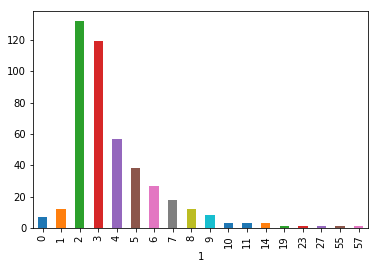

In [13]:
import matplotlib.pyplot as plt
in_degree_df = pd.DataFrame(in_degree)

groups = in_degree_df.groupby(1)

groups.size().plot('bar')
plt.show()

Below, the weighted average in-degree of the graph. This number validates the results depicted in the plot above.

In [14]:
weighted_avg_degree = 0
for index, item in groups.size().iteritems():
    weighted_avg_degree += index * item
    
    
weighted_avg_degree /= groups.size().sum()
print(weighted_avg_degree)

4


The distribution of the out-degrees of the graph are plotted below. We observe that the results look like a Gaussian bell curve.

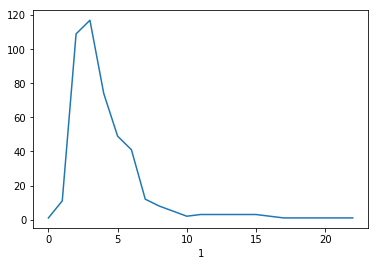

In [15]:
out_degree_df = pd.DataFrame(out_degree)

groups = out_degree_df.groupby(1)

groups.size().plot()
plt.show()

* Who is the most connected representative?

Finally, the most connected representatives based on the in and out-degrees, are selected.

This is done by sorting the sum of in-degrees and out-degrees and providing the results for the most connected representatives based on those results.

In [16]:
degree = [(x[0], x[1] + y[1]) for x, y in zip(in_degree, out_degree)]

sorted_degree = sorted(degree, key=lambda x: x[1], reverse=True)
print("Most connected representative is : "+sorted_degree[0][0])

Most connected representative is : John_Boehner
